<center><h1>1-ab: Introduction to Neural Networks</h1></center>

<center><h2><a href="https://rdfia.github.io/">Course link</a></h2></center>

# Warning :
# Do "File -> Save a copy in Drive" before you start modifying the notebook, otherwise your modifications will not be saved.


In [1]:
!wget https://github.com/rdfia/rdfia.github.io/raw/master/data/2-ab.zip
!unzip -j 2-ab.zip
!wget https://github.com/rdfia/rdfia.github.io/raw/master/code/2-ab/utils-data.py

--2023-10-04 14:10:05--  https://github.com/rdfia/rdfia.github.io/raw/master/data/2-ab.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/data/2-ab.zip [following]
--2023-10-04 14:10:06--  https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/data/2-ab.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13423991 (13M) [application/zip]
Saving to: '2-ab.zip.2'

2-ab.zip.2          100%[===================>]  12.80M  4.44MB/s    in 2.9s    

2023-10-04 14:10:10 (4.44 MB/s) - '2-ab.zip.2' saved [13423991/13423991]

Archive:  2-ab.zip
replace ._2-ab? [y]es, [n]

In [2]:
import math
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%run 'utils-data.py'

# Part 1 : Forward and backward passes "by hands"

In [3]:
def init_params(nx, nh, ny, std=1e-1):
    """
    nx, nh, ny: integers
    out params: dictionnary
    """
    params = {}

    #####################
    ## Your code here  ##
    #####################
    # fill values for Wh, Wy, bh, by

    params["Wh"] = torch.randn(nh, nx) * std
    params["Wy"] = torch.randn(ny, nh) * std
    params["bh"] = torch.zeros(nh)
    params["by"] = torch.zeros(ny)

    ####################
    ##      END        #
    ####################
    return params

In [4]:
def forward(params, X):
    """
    params: dictionnary
    X: (n_batch, dimension)
    """
    bsize = X.size(0)
    nh = params['Wh'].size(0)
    ny = params['Wy'].size(0)
    outputs = {}

    #####################
    ## Your code here  ##
    #####################
    # fill values for X, htilde, h, ytilde, yhat

    outputs["X"] = X
    outputs["htilde"] = torch.mm(X, params["Wh"].t()) + params["bh"].repeat(bsize, 1)
    outputs["h"] = torch.tanh(outputs["htilde"])
    outputs["ytilde"] = torch.mm(outputs["h"], params["Wy"].t()) + params["by"].repeat(bsize, 1)
    outputs["yhat"] = torch.softmax(outputs["ytilde"], dim=1)


    ####################
    ##      END        #
    ####################
    return outputs['yhat'], outputs

In [5]:
def loss_accuracy(Yhat, Y):

    #####################
    ## Your code here  ##
    #####################

    L = - torch.mean(torch.sum(Y * torch.log(Yhat)))
    _, indsYhat = torch.max(Yhat, 1)
    _, indsY = torch.max(Y, 1)
    acc =torch.sum(indsYhat == indsY) / indsY.size(0)*100


    ####################
    ##      END        #
    ####################

    return L, acc

In [6]:
def backward(params, outputs, Y):
    bsize = Y.shape[0]
    grads = {}

    #####################
    ## Your code here  ##
    #####################
    # fill values for Wy, Wh, by, bh

    grads["yhat"] = outputs['yhat'] - Y
    grads["Wy"] = torch.mm(grads["yhat"].t(), outputs["h"]) # / bsize
    grads["by"] = torch.sum(grads["yhat"], dim=0).t() # / bsize
    grads["htilde"] = torch.mm(grads["yhat"], params["Wy"]) * (1 - outputs["h"] ** 2)
    grads["Wh"] = torch.mm(grads["htilde"].t(), outputs["X"]) # / bsize
    grads["bh"] = torch.sum(grads["htilde"]).t() # / bsize
    
    ####################
    ##      END        #
    ####################
    return grads

In [7]:
def sgd(params, grads, eta):

    #####################
    ## Your code here  ##
    #####################
    # update the params values

    params["Wh"] = params["Wh"] - eta * grads["Wh"]
    params["Wy"] = params["Wy"] - eta * grads["Wy"]
    params["bh"] = params["bh"] - eta * grads["bh"]
    params["by"] = params["by"] - eta * grads["by"]

    ####################
    ##      END        #
    ####################
    return params

## Global learning procedure "by hands"

In [8]:
import torch
from sklearn.model_selection import train_test_split

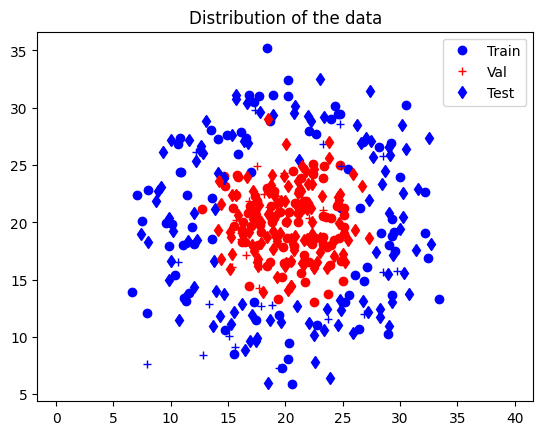

In [9]:
data = CirclesData()

Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.01

params = init_params(nx, nh, ny)

curves = [[],[], [], []]

# Assuming data.Xtrain and data.Ytrain are your data tensors
X = data.Xtrain
Y = data.Ytrain

# Convert the tensors to NumPy arrays if they are not already
X = X.numpy() if isinstance(X, torch.Tensor) else X
Y = Y.numpy() if isinstance(Y, torch.Tensor) else Y

# Split the data into training and validation sets
Xtrain, Xval, Ytrain, Yval = train_test_split(X, Y, test_size=0.2, random_state=42)

plt.plot(Xtrain[Ytrain[:,0] == 1,0]*10+20, Xtrain[Ytrain[:,0] == 1,1]*10+20, 'bo', label="Train")
plt.plot(Xtrain[Ytrain[:,1] == 1,0]*10+20, Xtrain[Ytrain[:,1] == 1,1]*10+20, 'ro')
plt.plot(Xval[Yval[:,0] == 1,0]*10+20, Xval[Yval[:,0] == 1,1]*10+20, 'b+')
plt.plot(Xval[Yval[:,1] == 1,0]*10+20, Xval[Yval[:,1] == 1,1]*10+20, 'r+',label="Val")
plt.plot(data.Xtest[data.Ytest[:,0] == 1,0]*10+20, data.Xtest[data.Ytest[:,0] == 1,1]*10+20, 'bd', label="Test")
plt.plot(data.Xtest[data.Ytest[:,1] == 1,0]*10+20, data.Xtest[data.Ytest[:,1] == 1,1]*10+20, 'rd')
plt.xlim(0,39)
plt.ylim(0,39)
plt.title('Distribution of the data')
plt.legend()
plt.axis('equal')
plt.savefig('data.png')
plt.show()


In [10]:
print(Xtrain.shape,Xval.shape,data.Xtest.shape)

(160, 2) (40, 2) torch.Size([200, 2])


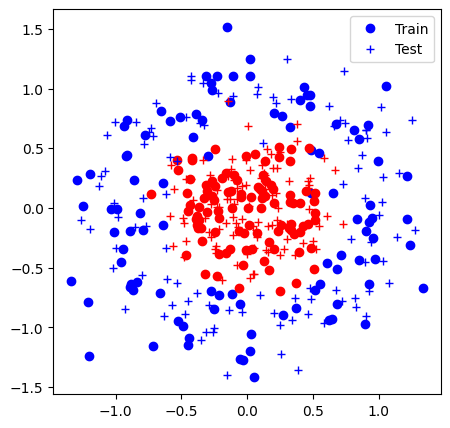

Iter 0: Acc train 50.6% (110.92), acc test 47.5% (27.76)
Iter 1: Acc train 50.6% (110.88), acc test 47.5% (27.78)
Iter 2: Acc train 50.6% (110.86), acc test 47.5% (27.81)
Iter 3: Acc train 55.6% (110.82), acc test 47.5% (27.80)
Iter 4: Acc train 55.0% (110.79), acc test 47.5% (27.83)
Iter 5: Acc train 50.6% (110.78), acc test 47.5% (27.90)
Iter 6: Acc train 50.6% (110.78), acc test 47.5% (27.95)
Iter 7: Acc train 61.2% (110.72), acc test 50.0% (27.92)
Iter 8: Acc train 65.0% (110.69), acc test 50.0% (27.92)
Iter 9: Acc train 58.1% (110.68), acc test 50.0% (28.00)
Iter 10: Acc train 65.0% (110.64), acc test 52.5% (28.01)
Iter 11: Acc train 67.5% (110.61), acc test 52.5% (28.02)
Iter 12: Acc train 65.0% (110.58), acc test 45.0% (28.05)
Iter 13: Acc train 53.8% (110.57), acc test 35.0% (28.05)
Iter 14: Acc train 49.4% (110.56), acc test 32.5% (28.07)
Iter 15: Acc train 66.2% (110.50), acc test 42.5% (28.16)
Iter 16: Acc train 51.2% (110.50), acc test 35.0% (28.15)
Iter 17: Acc train 51.2%

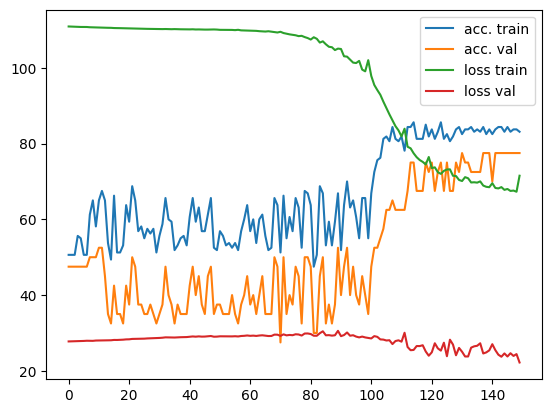

Test accuracy 76.5% (99.06)


In [11]:
# init
data = CirclesData()
data.plot_data()

Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.01

params = init_params(nx, nh, ny)

curves = [[],[], [], []]

# Assuming data.Xtrain and data.Ytrain are your data tensors
X = data.Xtrain
Y = data.Ytrain

# Convert the tensors to NumPy arrays if they are not already
X = X.numpy() if isinstance(X, torch.Tensor) else X
Y = Y.numpy() if isinstance(Y, torch.Tensor) else Y

# Split the data into training and validation sets
Xtrain, Xval, Ytrain, Yval = train_test_split(X, Y, test_size=0.2, random_state=42)


# If you want to convert them back to PyTorch tensors
X_train = torch.tensor(Xtrain)
X_val = torch.tensor(Xval)
Y_train = torch.tensor(Ytrain)
Y_val = torch.tensor(Yval)
N = X_train.shape[0]

# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = X_train[perm, :]
    Ytrain = Y_train[perm, :]

    #####################
    ## Your code here  ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

        # write the optimization algorithm on the batch (X,Y)
        # using the functions: forward, loss_accuracy, backward, sgd
        yhat, outputs = forward(params, X)
        L, acc = loss_accuracy(yhat, Y)
        grads = backward(params, outputs, Y)
        params = sgd(params, grads, eta)


    ####################
    ##      END        #
    ####################


    Yhat_train, _ = forward(params, X_train)
    Yhat_test, _ = forward(params, X_val)
    Ltrain, acctrain = loss_accuracy(Yhat_train, Y_train)
    Ltest, acctest = loss_accuracy(Yhat_test, Y_val)
    Ygrid, _ = forward(params, data.Xgrid)

    title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain, Ltrain, acctest, Ltest)
    print(title)
    #data.plot_data_with_grid(Ygrid, title)

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain)
    curves[3].append(Ltest)

fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. val")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss val")
plt.legend()
plt.show()


Yhat_test, _ = forward(params, data.Xtest)
Ltest, acctest = loss_accuracy(Yhat_test, data.Ytest)
print('Test accuracy {:.1f}% ({:.2f})'.format(acctest, Ltest))

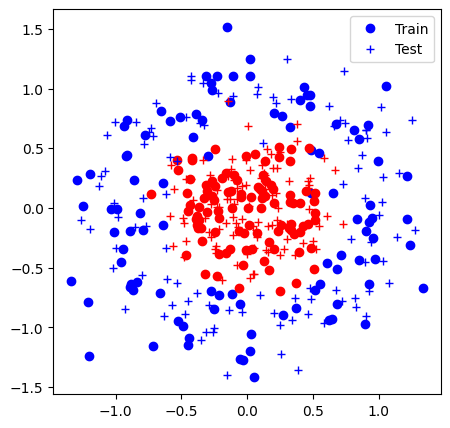

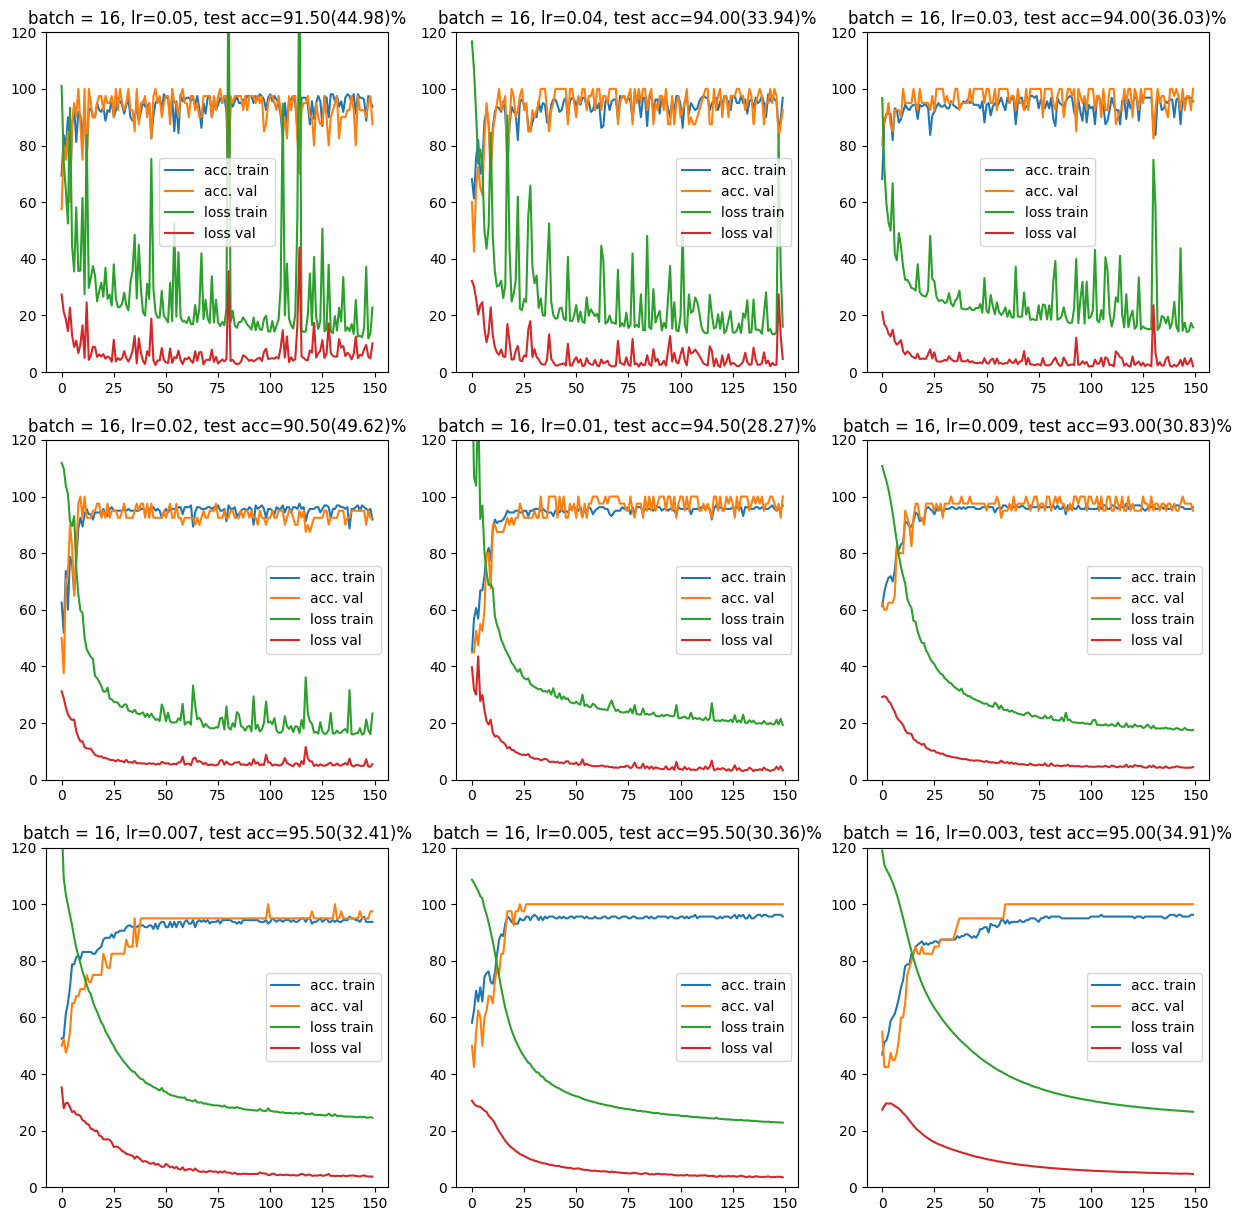

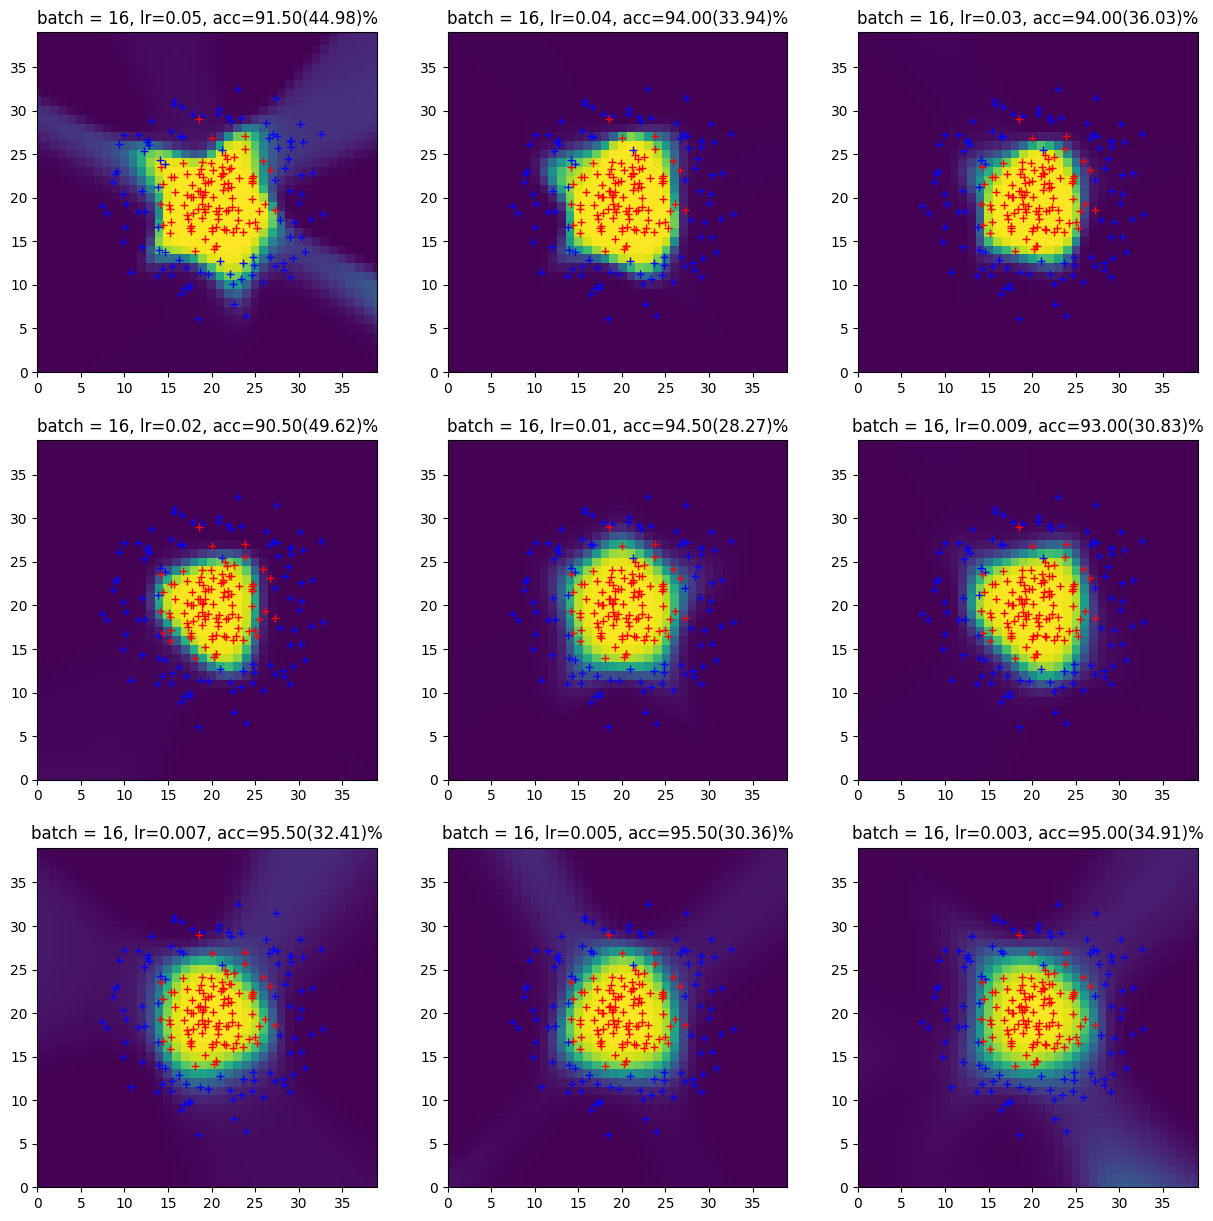

In [24]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.3
# Assuming data.Xtrain and data.Ytrain are your data tensors
X = data.Xtrain
Y = data.Ytrain

# Convert the tensors to NumPy arrays if they are not already
X = X.numpy() if isinstance(X, torch.Tensor) else X
Y = Y.numpy() if isinstance(Y, torch.Tensor) else Y

# Split the data into training and validation sets
Xtrain, Xval, Ytrain, Yval = train_test_split(X, Y, test_size=0.2, random_state=42)


# If you want to convert them back to PyTorch tensors
X_train = torch.tensor(Xtrain)
X_val = torch.tensor(Xval)
Y_train = torch.tensor(Ytrain)
Y_val = torch.tensor(Yval)
N = X_train.shape[0]


batch_list=[16]
lr_list=[0.05,0.04,0.03,0.02,0.01,0.009,0.007,0.005,0.003]

fig1, axes1 = plt.subplots(3, 3, figsize=(15, 15))
fig2, axes2 = plt.subplots(3, 3, figsize=(15, 15))

enu=-1
for Nbatch in batch_list:
    for eta in lr_list:
    # epoch
        enu+=1
        curves = [[],[], [], []]
        params = init_params(nx, nh, ny, std=1)
        for iteration in range(150):

            # permute
            perm = np.random.permutation(N)
            Xtrain = X_train[perm, :]
            Ytrain = Y_train[perm, :]

            #####################
            ## Your code  here ##
            #####################
            # batches
            for j in range(N // Nbatch):

                indsBatch = range(j * Nbatch, (j+1) * Nbatch)
                X = Xtrain[indsBatch, :]
                Y = Ytrain[indsBatch, :]

                # write the optimization algorithm on the batch (X,Y)
                yhat, outputs = forward(params, X)
                L, acc = loss_accuracy(yhat, Y)
                grads = backward(params, outputs, Y)
                params = sgd(params, grads, eta)


        ####################
        ##      FIN        #
        ####################


            Yhat_train, _ = forward(params, X_train)
            Yhat_test, _ = forward(params, X_val)
            Ltrain, acctrain = loss_accuracy(Yhat_train, Y_train)
            Ltest, acctest = loss_accuracy(Yhat_test, Y_val)
            Ygrid, _ = forward(params, data.Xgrid)

            title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain, Ltrain, acctest, Ltest)
            #print(title)
            

            curves[0].append(acctrain)
            curves[1].append(acctest)
            curves[2].append(Ltrain.detach().numpy())
            curves[3].append(Ltest.detach().numpy())
        


        Yhat_test, _ = forward(params, data.Xtest)
        Ltest, acctest = loss_accuracy(Yhat_test, data.Ytest)
        #print('Test accuracy {:.1f}% ({:.2f})'.format(acctest, Ltest))
        
        ax = axes1[enu // 3, enu % 3]
        ax.set_title("batch = {}, lr={}, test acc={:.2f}({:.2f})%".format(Nbatch,eta,acctest,Ltest))
        ax.plot(curves[0], label="acc. train")
        ax.plot(curves[1], label="acc. val")
        ax.plot(curves[2], label="loss train")
        ax.plot(curves[3], label="loss val")
        ax.set_ylim(0,120)
        ax.legend()

        ax = axes2[enu // 3, enu % 3]
        Ygrid = Ygrid[:,1].numpy()
        ax.imshow(np.reshape(Ygrid, (40,40)))
        ax.plot(data.Xtest[data.Ytest[:,0] == 1,0]*10+20, data.Xtest[data.Ytest[:,0] == 1,1]*10+20, 'b+', label="Test")
        ax.plot(data.Xtest[data.Ytest[:,1] == 1,0]*10+20, data.Xtest[data.Ytest[:,1] == 1,1]*10+20, 'r+')
        ax.set_xlim(0,39)
        ax.set_ylim(0,39)
        ax.set_title("batch = {}, lr={}, acc={:.2f}({:.2f})%".format(Nbatch,eta,acctest,Ltest))
fig1.savefig("loss_lr.png")
fig2.savefig("divide_lr.png")
plt.show()

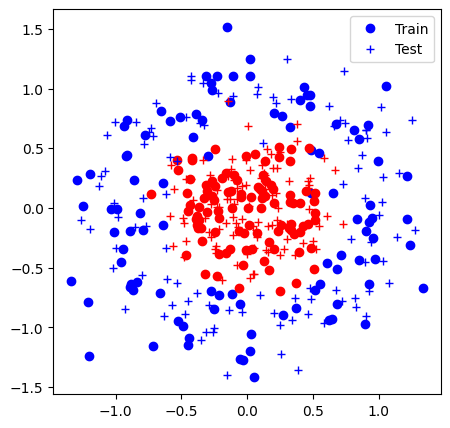

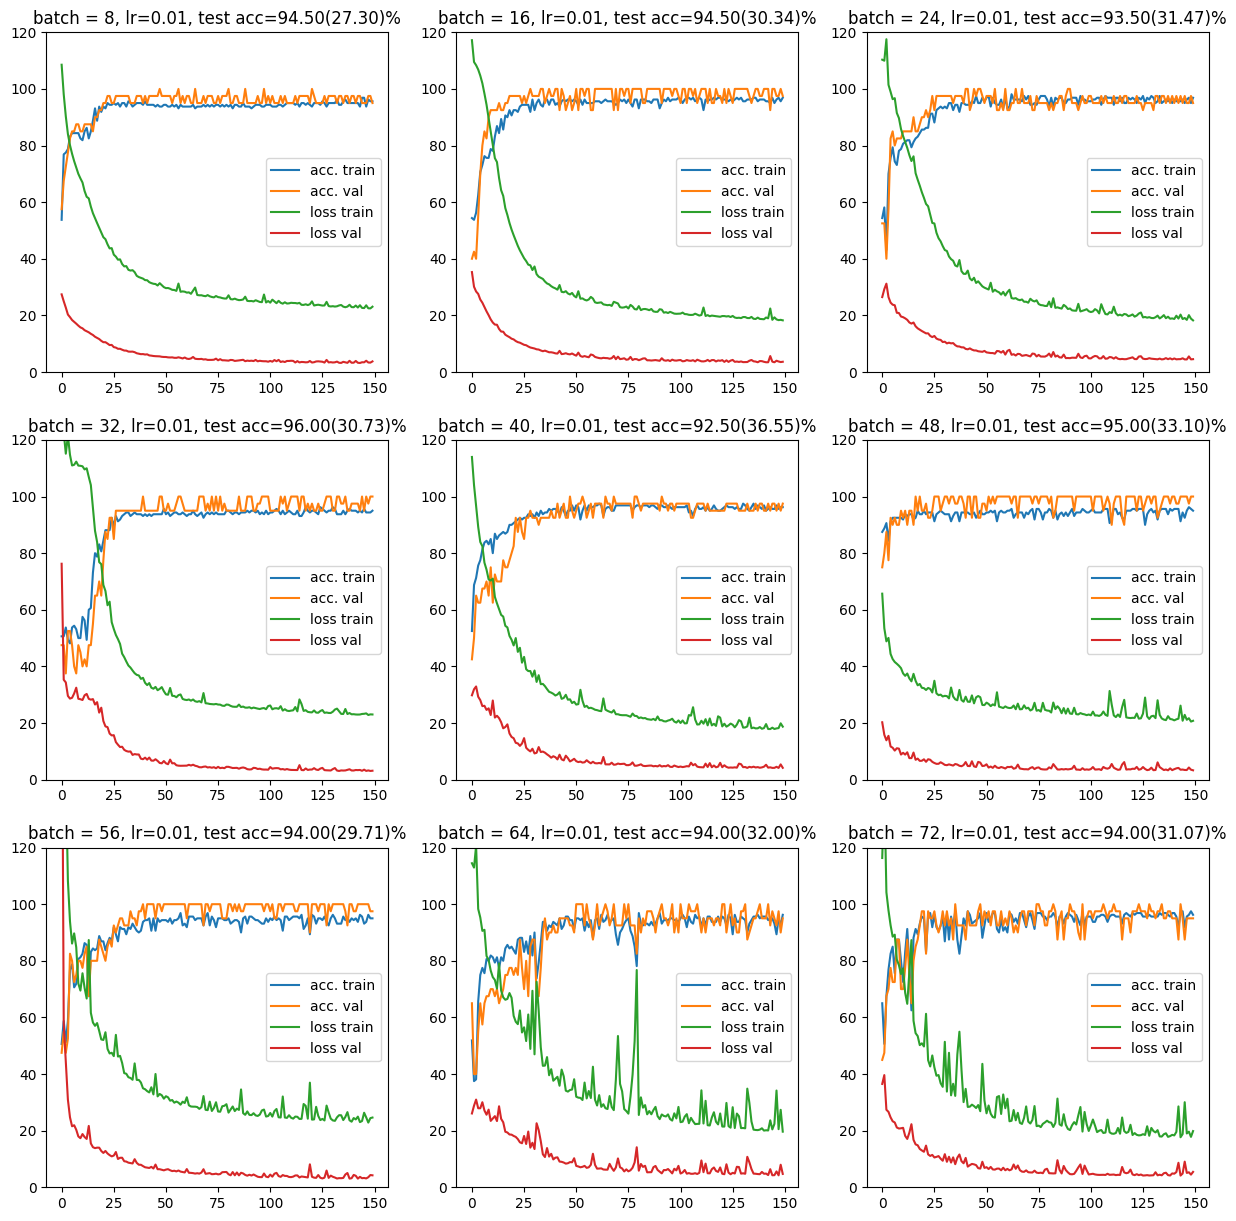

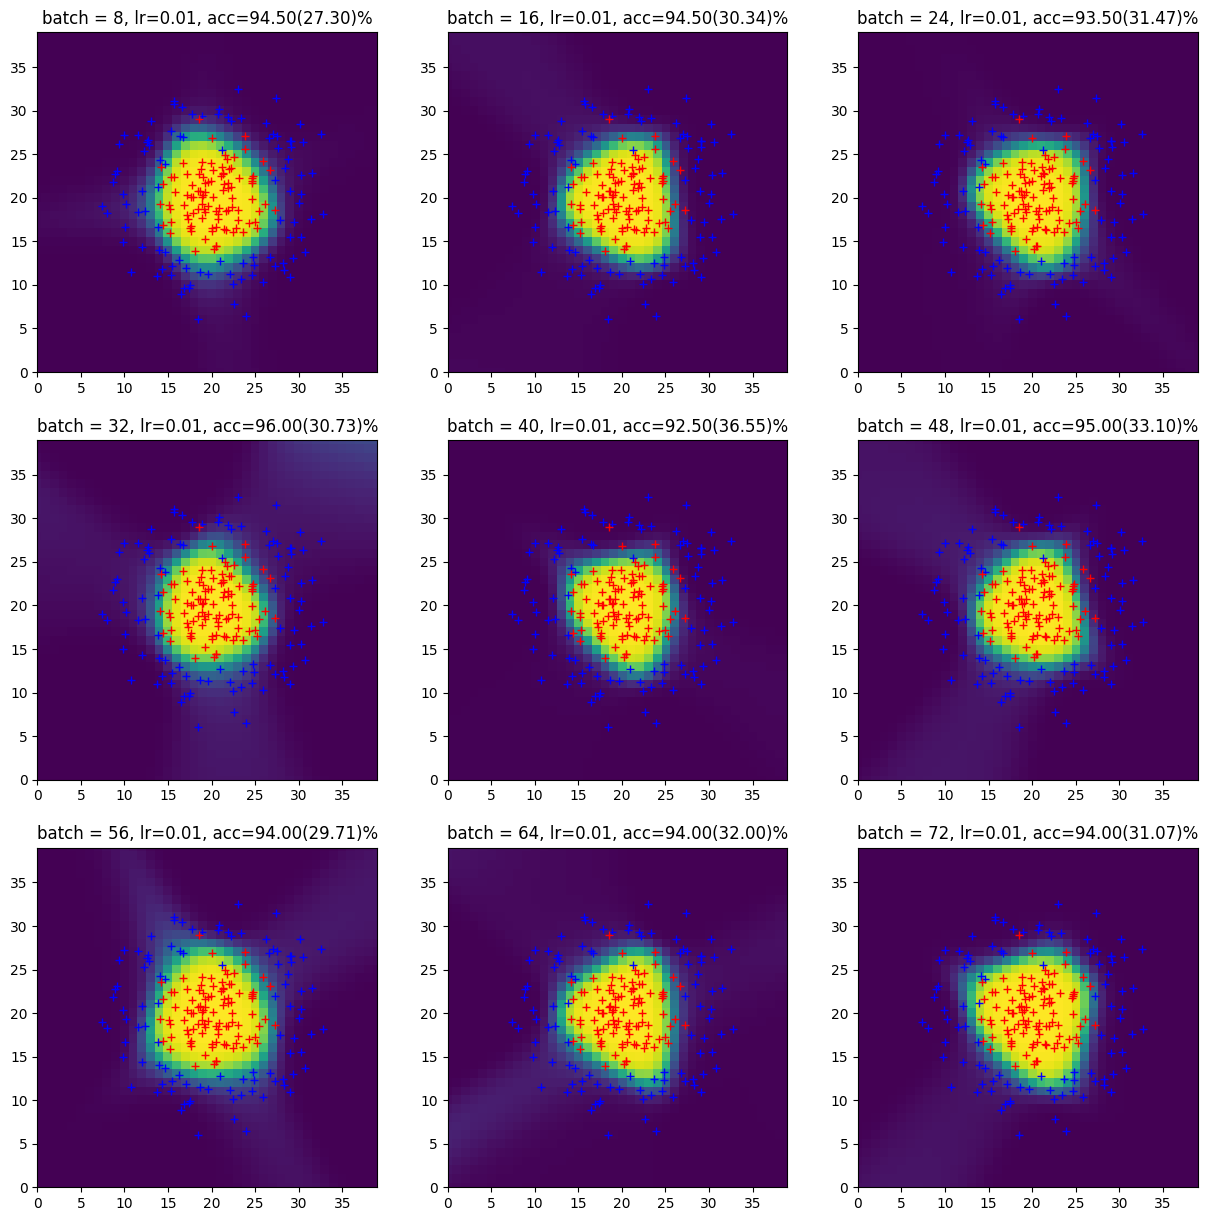

In [22]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.3
# Assuming data.Xtrain and data.Ytrain are your data tensors
X = data.Xtrain
Y = data.Ytrain

# Convert the tensors to NumPy arrays if they are not already
X = X.numpy() if isinstance(X, torch.Tensor) else X
Y = Y.numpy() if isinstance(Y, torch.Tensor) else Y

# Split the data into training and validation sets
Xtrain, Xval, Ytrain, Yval = train_test_split(X, Y, test_size=0.2, random_state=42)


# If you want to convert them back to PyTorch tensors
X_train = torch.tensor(Xtrain)
X_val = torch.tensor(Xval)
Y_train = torch.tensor(Ytrain)
Y_val = torch.tensor(Yval)
N = X_train.shape[0]


batch_list=[8,16,24,32,40,48,56,64,72]
lr_list=[0.01]

fig1, axes1 = plt.subplots(3, 3, figsize=(15, 15))
fig2, axes2 = plt.subplots(3, 3, figsize=(15, 15))

enu=-1
for Nbatch in batch_list:
    for eta in lr_list:
    # epoch
        enu+=1
        curves = [[],[], [], []]
        params = init_params(nx, nh, ny, std=1)
        for iteration in range(150):

            # permute
            perm = np.random.permutation(N)
            Xtrain = X_train[perm, :]
            Ytrain = Y_train[perm, :]

            #####################
            ## Your code  here ##
            #####################
            # batches
            for j in range(N // Nbatch):

                indsBatch = range(j * Nbatch, (j+1) * Nbatch)
                X = Xtrain[indsBatch, :]
                Y = Ytrain[indsBatch, :]

                # write the optimization algorithm on the batch (X,Y)
                yhat, outputs = forward(params, X)
                L, acc = loss_accuracy(yhat, Y)
                grads = backward(params, outputs, Y)
                params = sgd(params, grads, eta)


        ####################
        ##      FIN        #
        ####################


            Yhat_train, _ = forward(params, X_train)
            Yhat_test, _ = forward(params, X_val)
            Ltrain, acctrain = loss_accuracy(Yhat_train, Y_train)
            Ltest, acctest = loss_accuracy(Yhat_test, Y_val)
            Ygrid, _ = forward(params, data.Xgrid)

            title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain, Ltrain, acctest, Ltest)
            #print(title)
            

            curves[0].append(acctrain)
            curves[1].append(acctest)
            curves[2].append(Ltrain.detach().numpy())
            curves[3].append(Ltest.detach().numpy())
        


        Yhat_test, _ = forward(params, data.Xtest)
        Ltest, acctest = loss_accuracy(Yhat_test, data.Ytest)
        #print('Test accuracy {:.1f}% ({:.2f})'.format(acctest, Ltest))
        
        ax = axes1[enu // 3, enu % 3]
        ax.set_title("batch = {}, lr={}, test acc={:.2f}({:.2f})%".format(Nbatch,eta,acctest,Ltest))
        ax.plot(curves[0], label="acc. train")
        ax.plot(curves[1], label="acc. val")
        ax.plot(curves[2], label="loss train")
        ax.plot(curves[3], label="loss val")
        ax.set_ylim(0,120)
        ax.legend()

        ax = axes2[enu // 3, enu % 3]
        Ygrid = Ygrid[:,1].numpy()
        ax.imshow(np.reshape(Ygrid, (40,40)))
        ax.plot(data.Xtest[data.Ytest[:,0] == 1,0]*10+20, data.Xtest[data.Ytest[:,0] == 1,1]*10+20, 'b+', label="Test")
        ax.plot(data.Xtest[data.Ytest[:,1] == 1,0]*10+20, data.Xtest[data.Ytest[:,1] == 1,1]*10+20, 'r+')
        ax.set_xlim(0,39)
        ax.set_ylim(0,39)
        ax.set_title("batch = {}, lr={}, acc={:.2f}({:.2f})%".format(Nbatch,eta,acctest,Ltest))
fig1.savefig("loss_batch.png")
fig2.savefig("divide_batch.png")
plt.show()

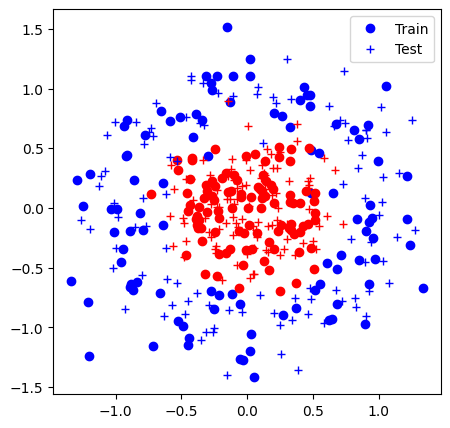

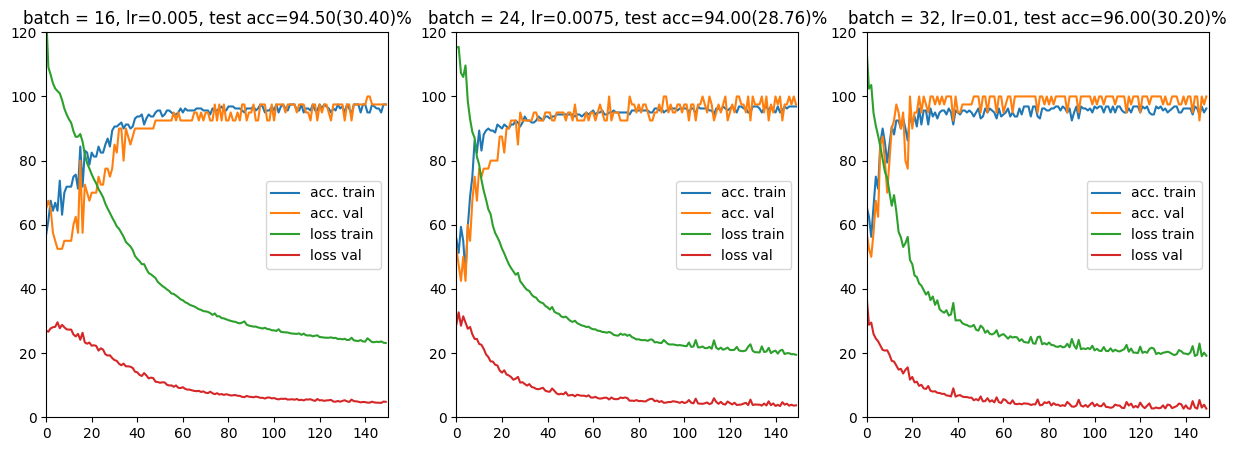

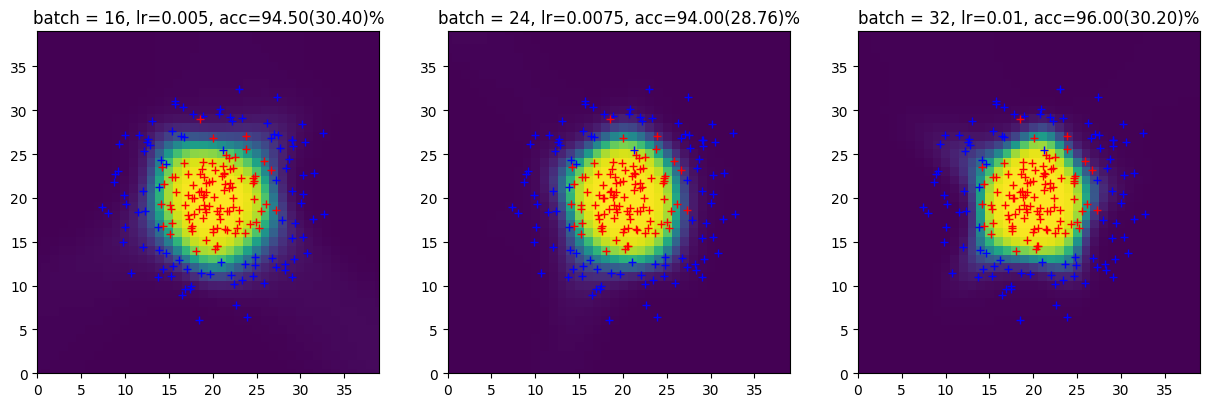

In [26]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.3
# Assuming data.Xtrain and data.Ytrain are your data tensors
X = data.Xtrain
Y = data.Ytrain

# Convert the tensors to NumPy arrays if they are not already
X = X.numpy() if isinstance(X, torch.Tensor) else X
Y = Y.numpy() if isinstance(Y, torch.Tensor) else Y

# Split the data into training and validation sets
Xtrain, Xval, Ytrain, Yval = train_test_split(X, Y, test_size=0.2, random_state=42)


# If you want to convert them back to PyTorch tensors
X_train = torch.tensor(Xtrain)
X_val = torch.tensor(Xval)
Y_train = torch.tensor(Ytrain)
Y_val = torch.tensor(Yval)
N = X_train.shape[0]


batch_lr_list=[[16,0.005],[24,0.0075],[32,0.01]]


fig1, axes1 = plt.subplots(1, 3, figsize=(15, 5))
fig2, axes2 = plt.subplots(1, 3, figsize=(15, 5))

enu=-1
for [Nbatch,eta] in batch_lr_list:
# print(N_e)
# Nbatch=N_e[0]
# eta=N_e[1]
# epoch
    enu+=1
    curves = [[],[], [], []]
    params = init_params(nx, nh, ny, std=1)
    for iteration in range(150):

        # permute
        perm = np.random.permutation(N)
        Xtrain = X_train[perm, :]
        Ytrain = Y_train[perm, :]

        #####################
        ## Your code  here ##
        #####################
        # batches
        for j in range(N // Nbatch):

            indsBatch = range(j * Nbatch, (j+1) * Nbatch)
            X = Xtrain[indsBatch, :]
            Y = Ytrain[indsBatch, :]

            # write the optimization algorithm on the batch (X,Y)
            yhat, outputs = forward(params, X)
            L, acc = loss_accuracy(yhat, Y)
            grads = backward(params, outputs, Y)
            params = sgd(params, grads, eta)


    ####################
    ##      FIN        #
    ####################


        Yhat_train, _ = forward(params, X_train)
        Yhat_test, _ = forward(params, X_val)
        Ltrain, acctrain = loss_accuracy(Yhat_train, Y_train)
        Ltest, acctest = loss_accuracy(Yhat_test, Y_val)
        Ygrid, _ = forward(params, data.Xgrid)

        title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain, Ltrain, acctest, Ltest)
        #print(title)
        

        curves[0].append(acctrain)
        curves[1].append(acctest)
        curves[2].append(Ltrain.detach().numpy())
        curves[3].append(Ltest.detach().numpy())
    


    Yhat_test, _ = forward(params, data.Xtest)
    Ltest, acctest = loss_accuracy(Yhat_test, data.Ytest)
    #print('Test accuracy {:.1f}% ({:.2f})'.format(acctest, Ltest))
    
    ax = axes1[enu ]
    ax.set_title("batch = {}, lr={}, test acc={:.2f}({:.2f})%".format(Nbatch,eta,acctest,Ltest))
    ax.plot(curves[0], label="acc. train")
    ax.plot(curves[1], label="acc. val")
    ax.plot(curves[2], label="loss train")
    ax.plot(curves[3], label="loss val")
    ax.set_xlim(0,150)
    ax.set_ylim(0,120)
    ax.legend()

    ax = axes2[enu ]
    Ygrid = Ygrid[:,1].numpy()
    ax.imshow(np.reshape(Ygrid, (40,40)))
    ax.plot(data.Xtest[data.Ytest[:,0] == 1,0]*10+20, data.Xtest[data.Ytest[:,0] == 1,1]*10+20, 'b+', label="Test")
    ax.plot(data.Xtest[data.Ytest[:,1] == 1,0]*10+20, data.Xtest[data.Ytest[:,1] == 1,1]*10+20, 'r+')
    ax.set_xlim(0,39)
    ax.set_ylim(0,39)
    ax.set_title("batch = {}, lr={}, acc={:.2f}({:.2f})%".format(Nbatch,eta,acctest,Ltest))
fig1.savefig("loss_batch_lr.png")
fig2.savefig("divide_batch_lr.png")
plt.show()

# Part 2 : Simplification of the backward pass with `torch.autograd`



In [2]:
def init_params(nx, nh, ny):
    """
    nx, nh, ny: integers
    out params: dictionnary
    """
    params = {}

    #####################
    ## Your code here  ##
    #####################
    # fill values for Wh, Wy, bh, by
    # activaye autograd on the network weights


    params["Wh"] = torch.randn(nh, nx, requires_grad=True)
    params["Wy"] = torch.randn(ny, nh, requires_grad=True)
    params["bh"] = torch.zeros(nh, requires_grad=True)
    params["by"] = torch.zeros(ny, requires_grad=True)
    

    ####################
    ##      END        #
    ####################
    return params

The function `forward` remains unchanged from previous part.

The function `backward` is no longer used because of "autograd".

In [3]:
def sgd(params, eta):

    #####################
    ## Your code here  ##
    #####################
    # update the network weights
    # warning: use torch.no_grad()
    # and reset to zero the gradient accumulators

    with torch.no_grad():  # Use torch.no_grad() to avoid tracking operations in autograd
        params['Wy'] -= eta * params['Wy'].grad
        params['Wh'] -= eta * params['Wh'].grad
        params['by'] -= eta * params['by'].grad
        params['bh'] -= eta * params['bh'].grad
        
        # Reset the gradient accumulator to zero
        params['Wy'].grad.zero_()
        params['Wh'].grad.zero_()
        params['by'].grad.zero_()
        params['bh'].grad.zero_()
    ####################
    ##      END        #
    ####################
    return params

## Global learning procedure with autograd

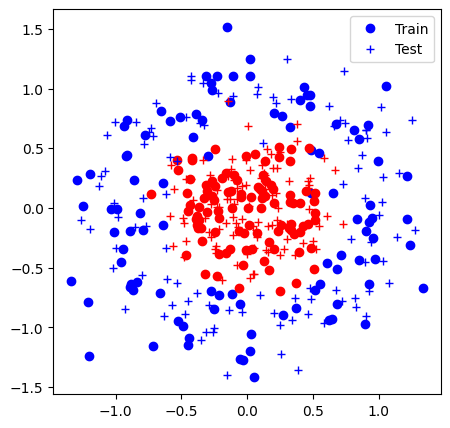

Iter 0: Acc train 49.4% (122.04), acc val 55.0% (26.25)
Iter 1: Acc train 61.9% (99.39), acc val 55.0% (27.10)
Iter 2: Acc train 76.2% (93.80), acc val 65.0% (24.61)
Iter 3: Acc train 76.2% (92.04), acc val 77.5% (23.96)
Iter 4: Acc train 84.4% (85.54), acc val 75.0% (24.66)
Iter 5: Acc train 83.8% (82.45), acc val 75.0% (23.94)
Iter 6: Acc train 81.9% (78.83), acc val 70.0% (23.80)
Iter 7: Acc train 86.9% (75.09), acc val 77.5% (21.61)
Iter 8: Acc train 86.2% (72.04), acc val 82.5% (20.35)
Iter 9: Acc train 87.5% (69.56), acc val 80.0% (20.52)
Iter 10: Acc train 88.1% (66.82), acc val 80.0% (19.14)
Iter 11: Acc train 88.1% (66.64), acc val 90.0% (18.32)
Iter 12: Acc train 88.1% (61.78), acc val 80.0% (18.83)
Iter 13: Acc train 90.0% (59.35), acc val 82.5% (17.46)
Iter 14: Acc train 91.9% (57.37), acc val 92.5% (15.96)
Iter 15: Acc train 91.9% (55.56), acc val 92.5% (15.78)
Iter 16: Acc train 88.8% (53.92), acc val 85.0% (16.54)
Iter 17: Acc train 90.6% (51.72), acc val 87.5% (15.47)
I

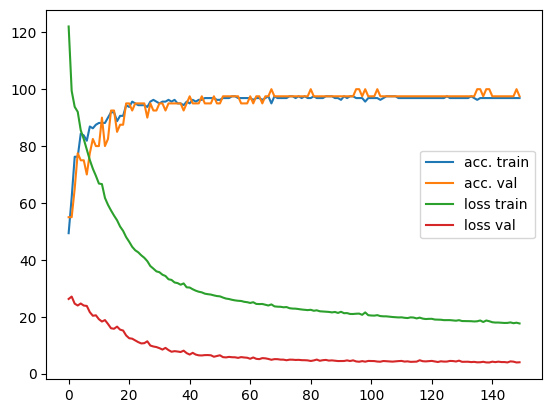

Test accuracy 94.0% (30.22)


In [112]:
# init
data = CirclesData()
data.plot_data()
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.01

# Assuming data.Xtrain and data.Ytrain are your data tensors
X = data.Xtrain
Y = data.Ytrain

# Convert the tensors to NumPy arrays if they are not already
X = X.numpy() if isinstance(X, torch.Tensor) else X
Y = Y.numpy() if isinstance(Y, torch.Tensor) else Y

# Split the data into training and validation sets
Xtrain, Xval, Ytrain, Yval = train_test_split(X, Y, test_size=0.2, random_state=42)


# If you want to convert them back to PyTorch tensors
X_train = torch.tensor(Xtrain)
X_val = torch.tensor(Xval)
Y_train = torch.tensor(Ytrain)
Y_val = torch.tensor(Yval)
N = X_train.shape[0]

params = init_params(nx, nh, ny)

curves = [[],[], [], []]

# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = X_train[perm, :]
    Ytrain = Y_train[perm, :]

    #####################
    ## Your code here  ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

        # write the optimization algorithm on the batch (X,Y)
        # using the functions: forward, loss_accuracy, sgd
        # and the backward function with autograd
        Yhat, outputs = forward(params, X)
        L, acc = loss_accuracy(Yhat, Y)
        L.backward()
        params = sgd(params, eta)

    ####################
    ##      END        #
    ####################


    Yhat_train, _ = forward(params, X_train)
    Yhat_test, _ = forward(params, X_val)
    Ltrain, acctrain = loss_accuracy(Yhat_train, Y_train)
    Ltest, acctest = loss_accuracy(Yhat_test, Y_val)
    Ygrid, _ = forward(params, data.Xgrid)

    title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc val {:.1f}% ({:.2f})'.format(iteration, acctrain, Ltrain, acctest, Ltest)
    print(title)
    # detach() is used to remove the predictions from the computational graph in autograd
    #data.plot_data_with_grid(Ygrid.detach(), title)

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain.detach().numpy())
    curves[3].append(Ltest.detach().numpy())

fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. val")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss val")
plt.legend()
plt.show()

Yhat_test, _ = forward(params, data.Xtest)
Ltest, acctest = loss_accuracy(Yhat_test, data.Ytest)
print('Test accuracy {:.1f}% ({:.2f})'.format(acctest, Ltest))


# Part 3 : Simplification of the forward pass with `torch.nn`

`init_params` and `forward` are replaced by the `init_model` function which defines the network architecture and the loss.

In [4]:
def init_model(nx, nh, ny):

    #####################
    ## Your code here  ##
    #####################

    model = torch.nn.Sequential(
        torch.nn.Linear(nx, nh),
        torch.nn.Tanh(),
        torch.nn.Linear(nh, ny),
        torch.nn.Softmax(dim=1))
        
    loss = torch.nn.CrossEntropyLoss()

    ####################
    ##      END        #
    ####################

    return model, loss

In [5]:
def loss_accuracy(loss, Yhat, Y):

    #####################
    ## Your code here  ##
    #####################
    # call the loss function

    L = loss(Yhat, Y)
    _, indYhat = torch.max(Yhat, 1)
    _, indY = torch.max(Y, 1)
    acc = torch.mean((indYhat == indY).float())

    ####################
    ##      END        #
    ####################

    return L, acc

In [6]:
def sgd(model, eta):

    #####################
    ## Your code here  ##
    #####################
    # update the network weights
    # warning: use torch.no_grad()
    # and reset to zero the gradient accumulators

    with torch.no_grad():
        for param in model.parameters():
            param -= eta * param.grad
            param.grad.zero_()
    ####################
    ##      END        #
    ####################
    return model

## Global learning procedure with autograd and `torch.nn`

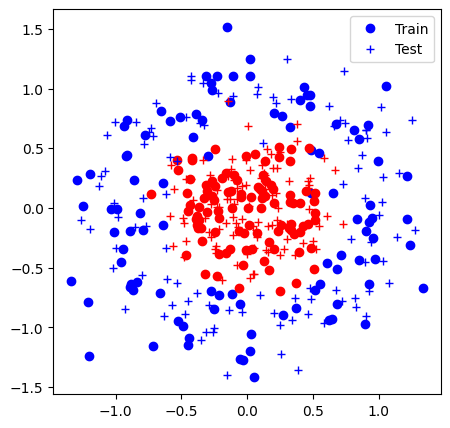

Iter 0: Acc train 0.7 (0.69), acc val 0.6 (0.70)
Iter 1: Acc train 0.7 (0.68), acc val 0.5 (0.71)
Iter 2: Acc train 0.7 (0.68), acc val 0.5 (0.72)
Iter 3: Acc train 0.7 (0.67), acc val 0.5 (0.72)
Iter 4: Acc train 0.7 (0.67), acc val 0.5 (0.73)
Iter 5: Acc train 0.7 (0.67), acc val 0.5 (0.73)
Iter 6: Acc train 0.7 (0.66), acc val 0.5 (0.73)
Iter 7: Acc train 0.7 (0.66), acc val 0.5 (0.73)
Iter 8: Acc train 0.7 (0.66), acc val 0.5 (0.73)
Iter 9: Acc train 0.7 (0.65), acc val 0.5 (0.73)
Iter 10: Acc train 0.7 (0.65), acc val 0.5 (0.72)
Iter 11: Acc train 0.7 (0.64), acc val 0.6 (0.72)
Iter 12: Acc train 0.7 (0.63), acc val 0.6 (0.71)
Iter 13: Acc train 0.7 (0.63), acc val 0.5 (0.70)
Iter 14: Acc train 0.7 (0.62), acc val 0.6 (0.69)
Iter 15: Acc train 0.7 (0.61), acc val 0.6 (0.67)
Iter 16: Acc train 0.7 (0.60), acc val 0.6 (0.65)
Iter 17: Acc train 0.7 (0.59), acc val 0.6 (0.64)
Iter 18: Acc train 0.9 (0.57), acc val 0.8 (0.61)
Iter 19: Acc train 0.8 (0.56), acc val 0.7 (0.60)
Iter 20: A

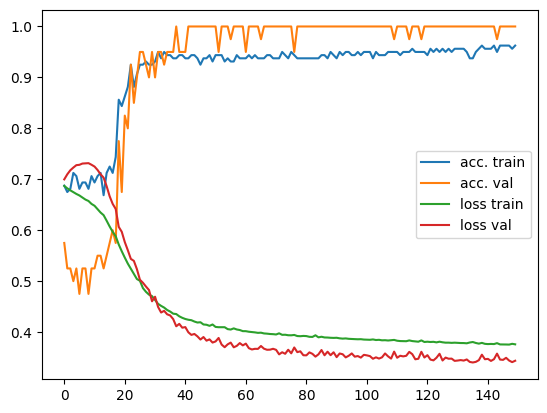

Test accuracy 94.0% (0.38)


In [119]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.3
# Assuming data.Xtrain and data.Ytrain are your data tensors
X = data.Xtrain
Y = data.Ytrain

# Convert the tensors to NumPy arrays if they are not already
X = X.numpy() if isinstance(X, torch.Tensor) else X
Y = Y.numpy() if isinstance(Y, torch.Tensor) else Y

# Split the data into training and validation sets
Xtrain, Xval, Ytrain, Yval = train_test_split(X, Y, test_size=0.2, random_state=42)


# If you want to convert them back to PyTorch tensors
X_train = torch.tensor(Xtrain)
X_val = torch.tensor(Xval)
Y_train = torch.tensor(Ytrain)
Y_val = torch.tensor(Yval)
N = X_train.shape[0]

model, loss = init_model(nx, nh, ny)

curves = [[],[], [], []]

# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = X_train[perm, :]
    Ytrain = Y_train[perm, :]

    #####################
    ## Your code here  ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

        # write the optimization algorithm on the batch (X,Y)
        # using the functions: loss_accuracy, sgd
        # the forward with the predict method from the model
        # and the backward function with autograd
        
        Yhat = model(X)
        L, acc = loss_accuracy(loss, Yhat, Y)
        L.backward()
        model = sgd(model, eta)
        
    ####################
    ##      END        #
    ####################


    Yhat_train = model(X_train)
    Yhat_test = model(X_val)
    Ltrain, acctrain = loss_accuracy(loss, Yhat_train, Y_train)
    Ltest, acctest = loss_accuracy(loss, Yhat_test, Y_val)
    Ygrid = model(data.Xgrid)

    title = 'Iter {}: Acc train {:.1f} ({:.2f}), acc val {:.1f} ({:.2f})'.format(iteration, acctrain, Ltrain, acctest, Ltest)
    print(title)
    #data.plot_data_with_grid(torch.nn.Softmax(dim=1)(Ygrid.detach()), title)

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain.detach().numpy())
    curves[3].append(Ltest.detach().numpy())

fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. val")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss val")
plt.legend()
plt.show()

Yhat_test = model(params, data.Xtest)
Ltest, acctest = loss_accuracy(loss,Yhat_test, data.Ytest)
print('Test accuracy {:.1f}% ({:.2f})'.format(acctest*100, Ltest))

# Part 4 : Simplification of the SGD with `torch.optim`

In [7]:
def init_model(nx, nh, ny, eta):

    #####################
    ## Your code here  ##
    #####################

    model = torch.nn.Sequential(
        torch.nn.Linear(nx, nh),
        torch.nn.Tanh(),
        torch.nn.Linear(nh, ny),
        torch.nn.Softmax(dim=1))
        
    loss = torch.nn.CrossEntropyLoss()

    optim = torch.optim.SGD(model.parameters(), lr=eta)

    ####################
    ##      END        #
    ####################

    return model, loss, optim

The `sgd` function is replaced by calling the `optim.zero_grad()` before the backward and `optim.step()` after.

## Algorithme global d'apprentissage (avec autograd, les couches `torch.nn` et `torch.optim`)

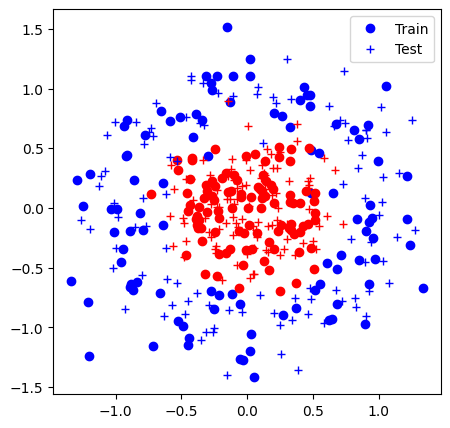

Test accuracy 0.9% (0.38)
Test accuracy 0.8% (0.55)
Test accuracy 0.6% (0.69)
Test accuracy 0.9% (0.41)
Test accuracy 0.7% (0.68)
Test accuracy 0.3% (0.70)
Test accuracy 0.5% (0.69)
Test accuracy 0.5% (0.69)
Test accuracy 0.6% (0.69)


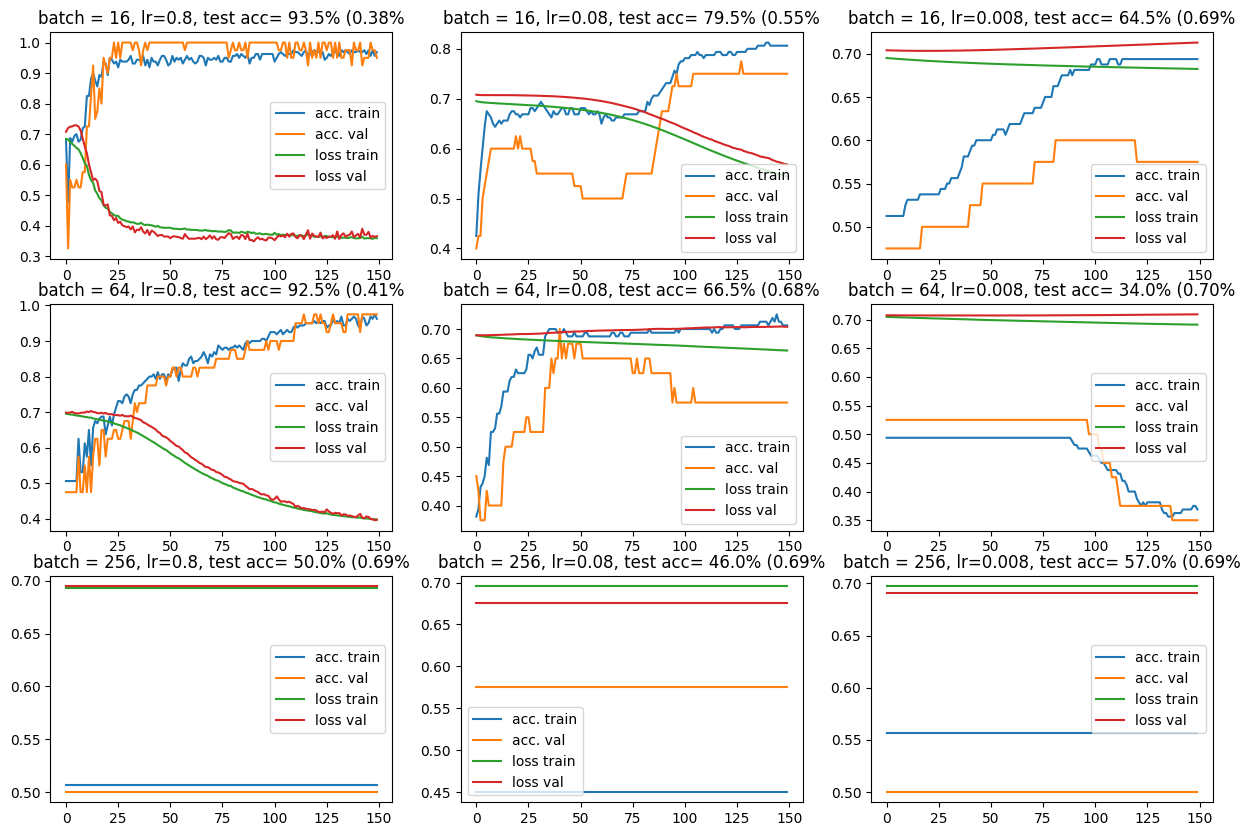

In [126]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.3
# Assuming data.Xtrain and data.Ytrain are your data tensors
X = data.Xtrain
Y = data.Ytrain

# Convert the tensors to NumPy arrays if they are not already
X = X.numpy() if isinstance(X, torch.Tensor) else X
Y = Y.numpy() if isinstance(Y, torch.Tensor) else Y

# Split the data into training and validation sets
Xtrain, Xval, Ytrain, Yval = train_test_split(X, Y, test_size=0.2, random_state=42)


# If you want to convert them back to PyTorch tensors
X_train = torch.tensor(Xtrain)
X_val = torch.tensor(Xval)
Y_train = torch.tensor(Ytrain)
Y_val = torch.tensor(Yval)
N = X_train.shape[0]



batch_list=[2**4,2**6,2**8]
lr_list=[0.8,0.08,0.008]
plt.figure(figsize=(15,10))
enu=0
for Nbatch in batch_list:
    for eta in lr_list:
    # epoch
        enu+=1
        curves = [[],[], [], []]
        model, loss, optim = init_model(nx, nh, ny, eta)
        for iteration in range(150):

            # permute
            perm = np.random.permutation(N)
            Xtrain = X_train[perm, :]
            Ytrain = Y_train[perm, :]

            #####################
            ## Your code  here ##
            #####################
            # batches
            for j in range(N // Nbatch):

                indsBatch = range(j * Nbatch, (j+1) * Nbatch)
                X = Xtrain[indsBatch, :]
                Y = Ytrain[indsBatch, :]

                # write the optimization algorithm on the batch (X,Y)
                optim.zero_grad()
                # using the functions: loss_accuracy
                L, acc = loss_accuracy(loss, model(X), Y)
                # the forward with the predict method from the model
                # the backward function with autograd
                L.backward()
                # and then an optimization step
                optim.step()


        ####################
        ##      FIN        #
        ####################


            Yhat_train = model(X_train)
            Yhat_test = model(X_val)
            Ltrain, acctrain = loss_accuracy(loss, Yhat_train,Y_train)
            Ltest, acctest = loss_accuracy(loss, Yhat_test, Y_val)
            Ygrid = model(data.Xgrid)

            title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc val {:.1f}% ({:.2f})'.format(iteration, acctrain*100, Ltrain, acctest*100, Ltest)
            #print(title)
            #data.plot_data_with_grid(torch.nn.Softmax(dim=1)(Ygrid.detach()), title)

            curves[0].append(acctrain)
            curves[1].append(acctest)
            curves[2].append(Ltrain.detach().numpy())
            curves[3].append(Ltest.detach().numpy())
        Yhat_test= model(data.Xtest)
        Ltest, acctest = loss_accuracy(loss,Yhat_test, data.Ytest)
        print('Test accuracy {:.1f}% ({:.2f})'.format(acctest, Ltest))

        plt.subplot(3,3,enu)
        plt.title("batch = {}, lr={}, test acc= {:.1f}% ({:.2f}%".format(Nbatch,eta,acctest*100,Ltest))
        plt.plot(curves[0], label="acc. train")
        plt.plot(curves[1], label="acc. val")
        plt.plot(curves[2], label="loss train")
        plt.plot(curves[3], label="loss val")
        plt.legend()
plt.show()




# Part 5 : MNIST

Apply the code from previous part code to the MNIST dataset.

In [8]:
from sklearn.model_selection import train_test_split

# init
data = MNISTData()
N = data.Xtrain.shape[0]
Nbatch = 100
nx = data.Xtrain.shape[1]
nh = 100
ny = data.Ytrain.shape[1]
eta = 0.03
# Assuming data.Xtrain and data.Ytrain are your data tensors
X = data.Xtrain
Y = data.Ytrain

# Convert the tensors to NumPy arrays if they are not already
X = X.numpy() if isinstance(X, torch.Tensor) else X
Y = Y.numpy() if isinstance(Y, torch.Tensor) else Y

# Split the data into training and validation sets
Xtrain, Xval, Ytrain, Yval = train_test_split(X, Y, test_size=0.2, random_state=42)


# If you want to convert them back to PyTorch tensors
X_train = torch.tensor(Xtrain)
X_val = torch.tensor(Xval)
Y_train = torch.tensor(Ytrain)
Y_val = torch.tensor(Yval)
N = X_train.shape[0]

----------------------------------------------------
batch = 32, lr=0.03
----------------------------------------------------
Test accuracy 91.4% (1.55)
----------------------------------------------------
batch = 32, lr=0.05
----------------------------------------------------
Test accuracy 92.2% (1.54)
----------------------------------------------------
batch = 32, lr=0.1
----------------------------------------------------
Test accuracy 91.4% (1.55)
----------------------------------------------------
batch = 64, lr=0.03
----------------------------------------------------
Test accuracy 93.6% (1.53)
----------------------------------------------------
batch = 64, lr=0.05
----------------------------------------------------
Test accuracy 93.4% (1.53)
----------------------------------------------------
batch = 64, lr=0.1
----------------------------------------------------
Test accuracy 94.0% (1.52)
----------------------------------------------------
batch = 128, lr=0.03
----------

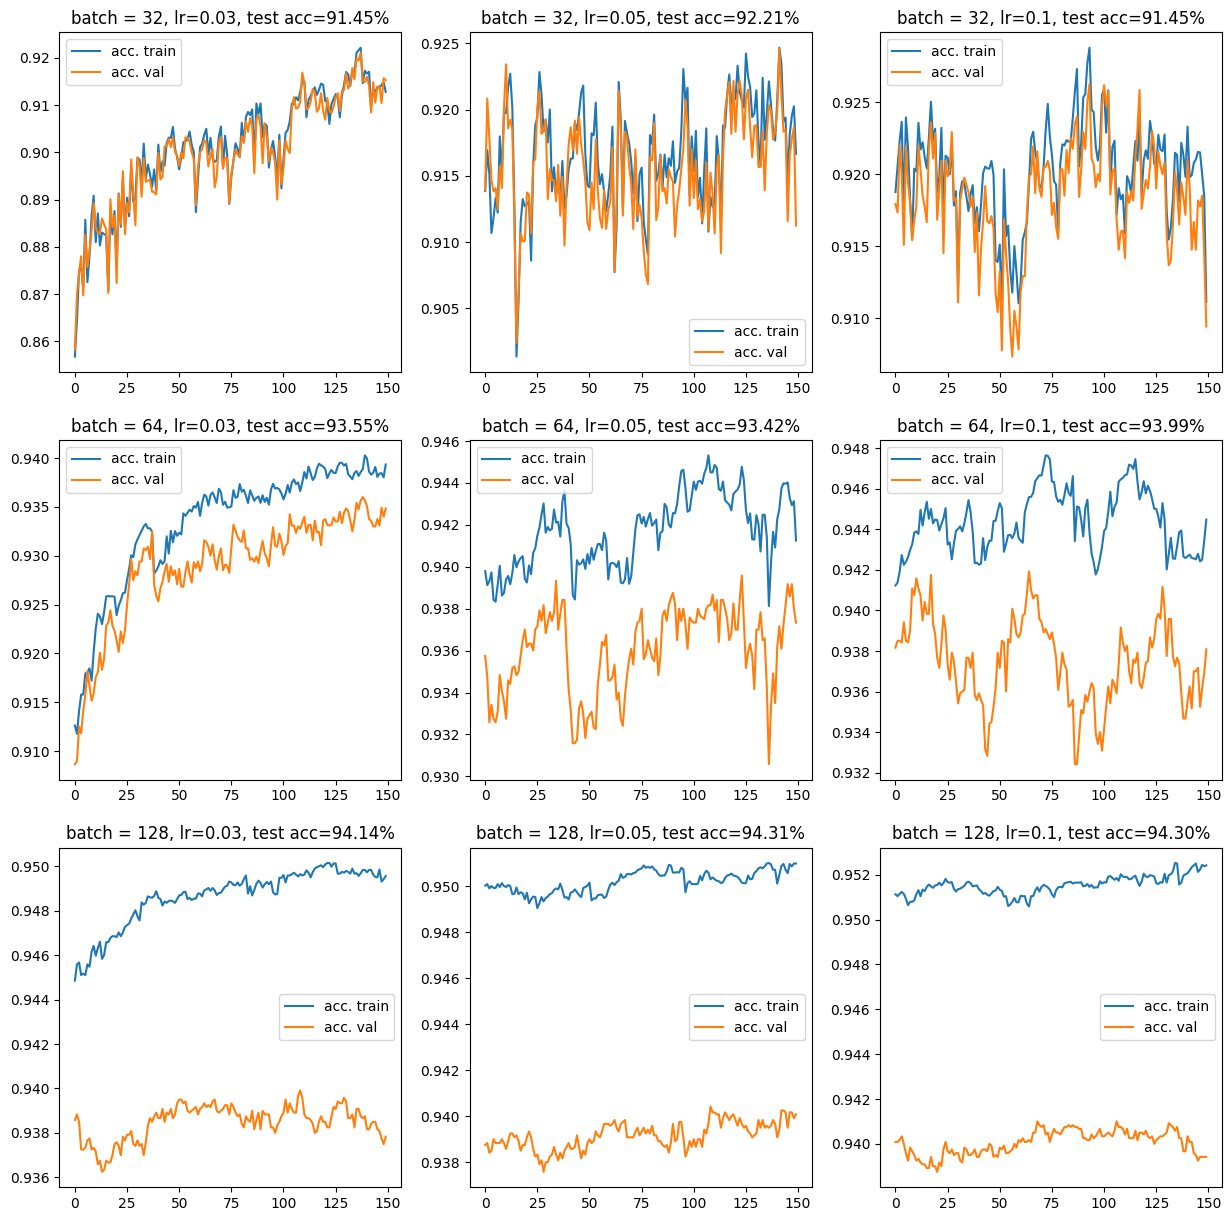

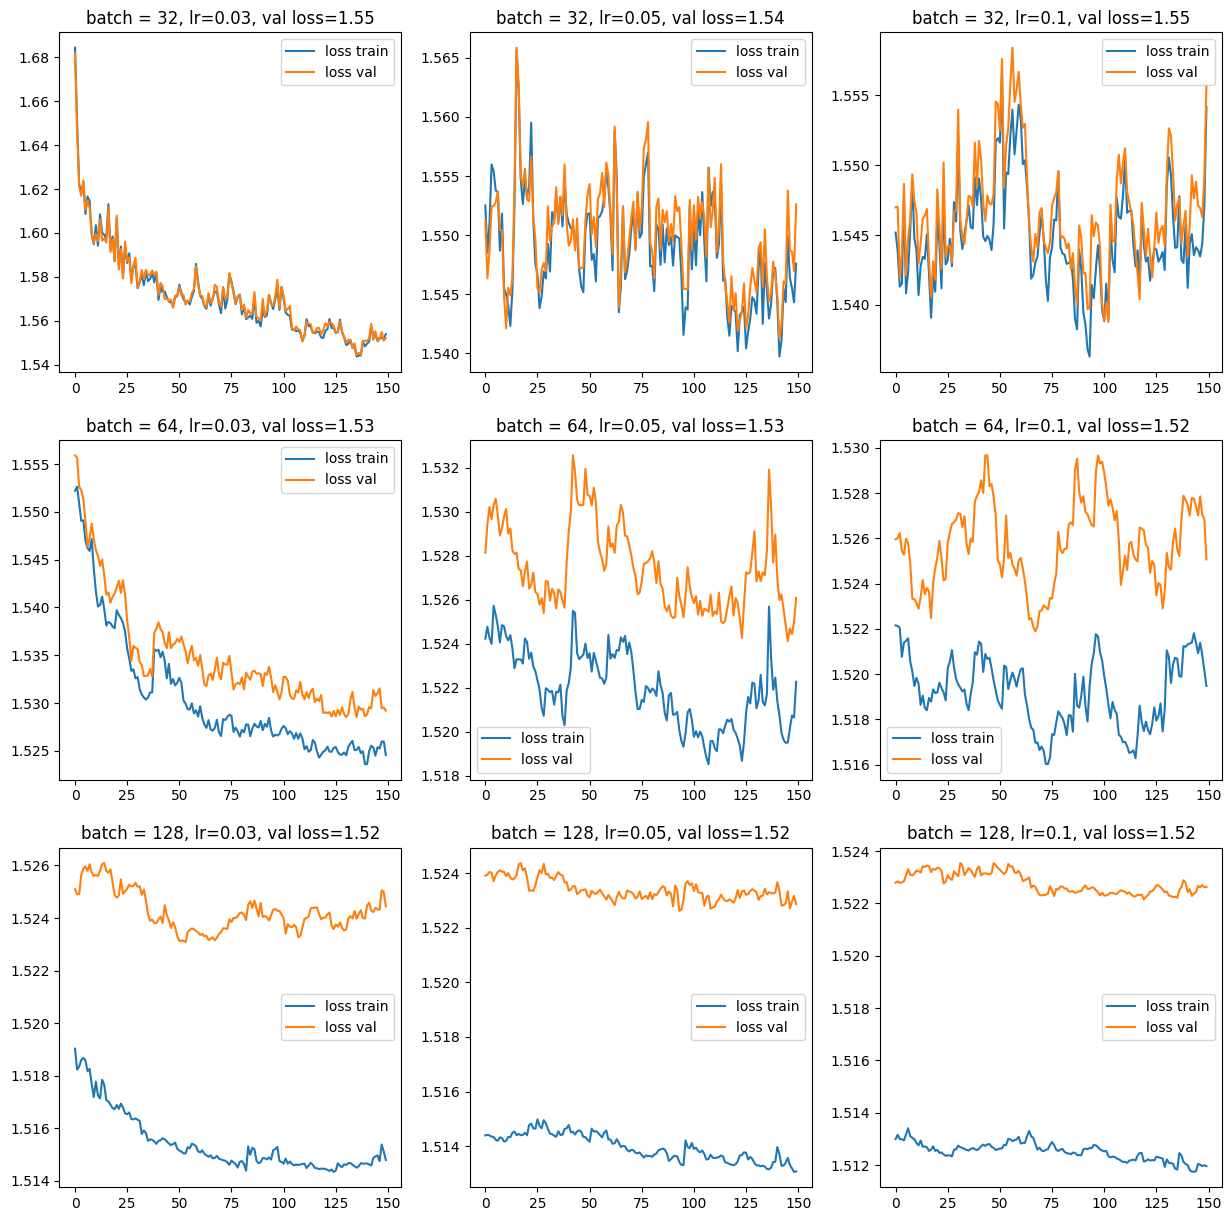

[0, tensor(0.8583), tensor(0.8700), tensor(0.8747), tensor(0.8780), tensor(0.8698), tensor(0.8825), tensor(0.8758), tensor(0.8791), tensor(0.8832), tensor(0.8892), tensor(0.8840), tensor(0.8830), tensor(0.8828), tensor(0.8860), tensor(0.8848), tensor(0.8837), tensor(0.8702), tensor(0.8901), tensor(0.8842), tensor(0.8866), tensor(0.8723), tensor(0.8912), tensor(0.8847), tensor(0.8960), tensor(0.8827), tensor(0.8892), tensor(0.8873), tensor(0.8985), tensor(0.8909), tensor(0.8846), tensor(0.8989), tensor(0.8972), tensor(0.8906), tensor(0.8988), tensor(0.8938), tensor(0.8941), tensor(0.8941), tensor(0.8917), tensor(0.8916), tensor(0.8911), tensor(0.8998), tensor(0.8942), tensor(0.8948), tensor(0.9013), tensor(0.9013), tensor(0.9028), tensor(0.9011), tensor(0.9032), tensor(0.9001), tensor(0.8992), tensor(0.8972), tensor(0.9000), tensor(0.8988), tensor(0.9032), tensor(0.9031), tensor(0.9022), tensor(0.9000), tensor(0.8986), tensor(0.8888), tensor(0.8968), tensor(0.9000), tensor(0.9007), tens

In [15]:
# init
model, loss, optim = init_model(nx, nh, ny, eta)
curves = [[],[], [], []]

batch_list=[32,64,128]
lr_list=[0.03,0.05,0.1]

fig1, axes1 = plt.subplots(3, 3, figsize=(15, 15))
fig2, axes2 = plt.subplots(3, 3, figsize=(15, 15))

model_best = model
acc_list=[0]

enu=-1
for Nbatch in batch_list:
    for eta in lr_list:
    # epoch
        enu+=1
        curves = [[],[], [], []]

        print('----------------------------------------------------')
        print('batch = {}, lr={}'.format(Nbatch,eta))
        print('----------------------------------------------------')
        # epoch
        for iteration in range(150):

            # permute
            perm = np.random.permutation(N)
            Xtrain = X_train[perm, :]
            Ytrain = Y_train[perm, :]

            #####################
            ## Your code  here ##
            #####################
            # batches
            for j in range(N // Nbatch):

                indsBatch = range(j * Nbatch, (j+1) * Nbatch)
                X = Xtrain[indsBatch, :]
                Y = Ytrain[indsBatch, :]

                # write the optimization algorithm on the batch (X,Y)
                optim.zero_grad()
                # using the functions: loss_accuracy
                L, acc = loss_accuracy(loss, model(X), Y)
                # the forward with the predict method from the model
                # the backward function with autograd
                L.backward()
                # and then an optimization step
                optim.step()


                ####################
                ##      FIN        #
                ####################


            Yhat_train = model(X_train)
            Yhat_test = model(X_val)
            Ltrain, acctrain = loss_accuracy(loss, Yhat_train, Y_train)
            Ltest, acctest = loss_accuracy(loss, Yhat_test, Y_val)


            title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc val {:.1f}% ({:.2f})'.format(iteration, acctrain*100, Ltrain, acctest*100, Ltest)
            #print(title)


            curves[0].append(acctrain)
            curves[1].append(acctest)
            curves[2].append(Ltrain.detach().numpy())
            curves[3].append(Ltest.detach().numpy())
            

        Yhat_test = model(data.Xtest)   
        Ltest, acctest = loss_accuracy(loss,Yhat_test, data.Ytest)
        print('Test accuracy {:.1f}% ({:.2f})'.format(acctest*100, Ltest))

        acc_list.append(acctest)
        if acctest>max(acc_list[:-1]):
            model_best=model

        ax = axes1[enu // 3, enu % 3]
        ax.set_title("batch = {}, lr={}, test acc={:.2f}%".format(Nbatch,eta,acctest*100))
        ax.plot(curves[0], label="acc. train")
        ax.plot(curves[1], label="acc. val")
        ax.legend()

        ax = axes2[enu // 3, enu % 3]
        ax.plot(curves[2], label="loss train")
        ax.plot(curves[3], label="loss val")
        ax.set_title("batch = {}, lr={}, val loss={:.2f}".format(Nbatch,eta,Ltest))
        ax.legend()
fig1.savefig("acc_batch_lr_mnist.png")
fig2.savefig("loss_batch_lr_mnist.png")
plt.show()
# Yhat_test = model(data.Xtest)
# Ltest, acctest = loss_accuracy(loss,Yhat_test, data.Ytest)
# print('Test accuracy {:.1f}% ({:.2f})'.format(acctest*100, Ltest))
print(acc_list)

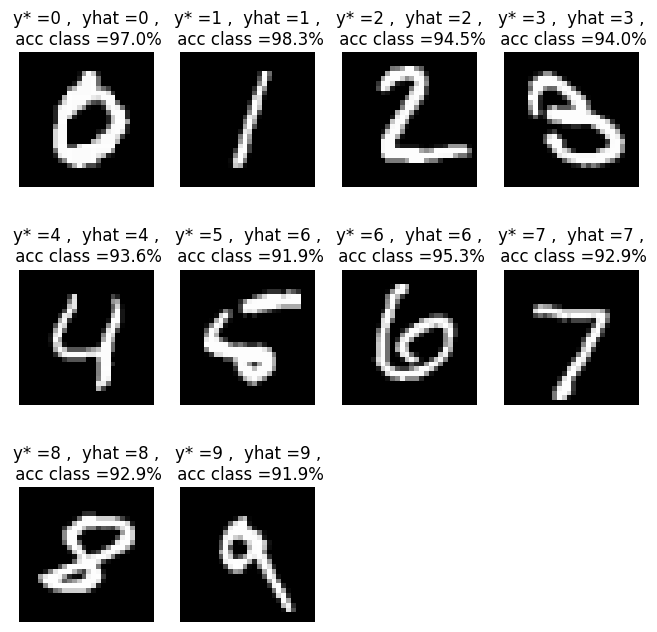

In [21]:
Yhat_test = model_best(data.Xtest)
Yhat_test = Yhat_test.argmax(dim=1).numpy()
Ytest = data.Ytest.argmax(dim=1).numpy()

plt.figure(figsize=(8,8))
for i in range (ny):
    ind_test=np.where(Ytest==i)[0]
    X_test=data.Xtest[ind_test,:]
    predict=model_best(X_test)
    Ltest, acctest = loss_accuracy(loss,predict, data.Ytest[ind_test])
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[0,:].reshape(28,28),cmap='gray')
    plt.title('y* ='+str(i)+' ,  yhat ='+str(predict[0].argmax().numpy())+' ,\n acc class ={:.1f}'.format(acctest*100)+'%')
    plt.axis('off')
#plt.title('Predicted label for misclassified images')
plt.savefig('mnist_predict.png')
plt.show()

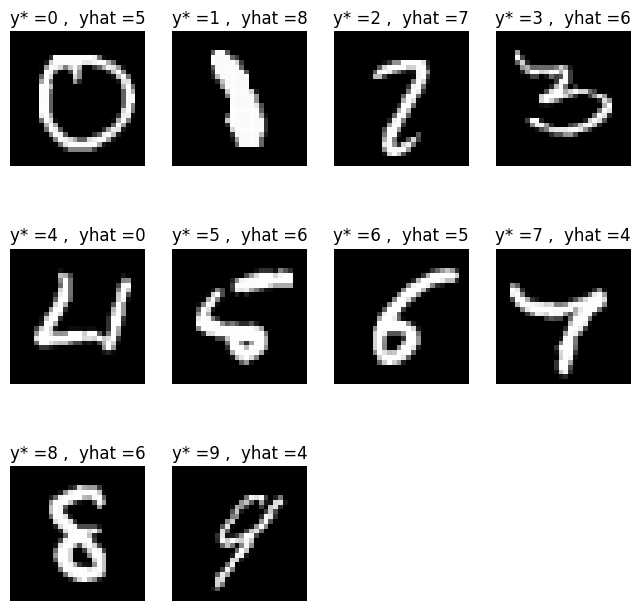

In [22]:
Yhat_test = model_best(data.Xtest)
Yhat_test = Yhat_test.argmax(dim=1).numpy()
Ytest = data.Ytest.argmax(dim=1).numpy()
X_faux=data.Xtest.numpy()[Yhat_test!=Ytest,:]
Y_faux=Yhat_test[Yhat_test!=Ytest]
Y_faux_true=Ytest[Yhat_test!=Ytest]

plt.figure(figsize=(8,8))
for i in range (ny):
    ind_test=np.where(Y_faux_true==i)[0]
    X_test=X_faux[ind_test,:]
    predict=model_best(torch.from_numpy(X_test))
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[0,:].reshape(28,28),cmap='gray')
    plt.title('y* ='+str(i)+' ,  yhat ='+str(predict[0].argmax().numpy()))
    plt.axis('off')
#plt.title('Predicted label for misclassified images')
plt.savefig('mnist_predict_faux.png')
plt.show()

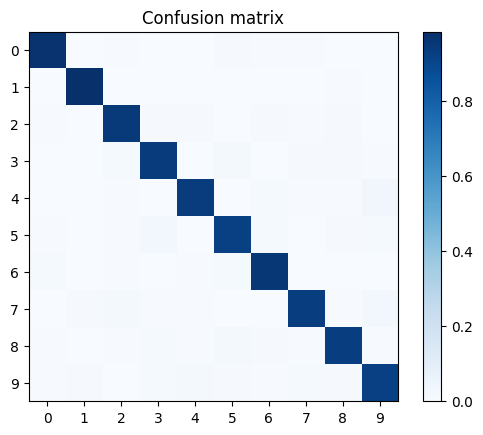

In [23]:
from sklearn.metrics import confusion_matrix
Yhat_test = model_best(data.Xtest)
Yhat_test = Yhat_test.argmax(dim=1).numpy()
Ytest = data.Ytest.argmax(dim=1).numpy()
cm = confusion_matrix(Ytest, Yhat_test)
cm = cm / cm.sum(axis=1)[:, np.newaxis]
plt.xticks(range(10))
plt.yticks(range(10))
plt.imshow(cm,cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.savefig('confusion_matrix_MNIST.png')

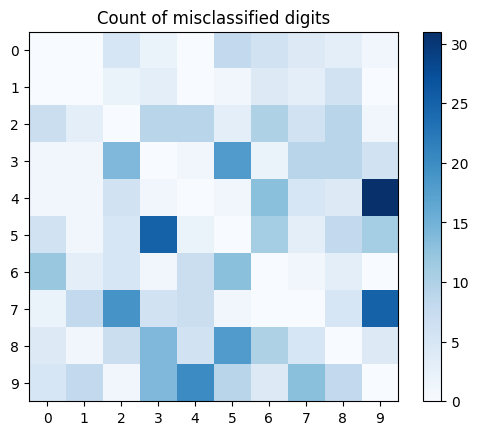

In [24]:
from sklearn.metrics import confusion_matrix
Yhat_test = model_best(data.Xtest)
Yhat_test = Yhat_test.argmax(dim=1).numpy()
Ytest = data.Ytest.argmax(dim=1).numpy()
cm = confusion_matrix(Ytest, Yhat_test)
np.fill_diagonal(cm, 0)
plt.xticks(range(10))
plt.yticks(range(10))
plt.imshow(cm,cmap=plt.cm.Blues)
plt.title('Count of misclassified digits')
plt.savefig('misclassified_MNIST.png')
plt.colorbar()

# Part 6: Bonus: SVM


Train a SVM model on the Circles dataset.

Ideas :
- First try a linear SVM (sklearn.svm.LinearSVC dans scikit-learn). Does it work well ? Why ?
- Then try more complex kernels (sklearn.svm.SVC). Which one is the best ? why ?
- Does the parameter C of regularization have an impact? Why ?

In [27]:
# data
data = CirclesData()
Xtrain = data.Xtrain.numpy()
Ytrain = data.Ytrain[:, 0].numpy()

Xgrid = data.Xgrid.numpy()

Xtest = data.Xtest.numpy()
Ytest = data.Ytest[:, 0].numpy()

def plot_svm_predictions(data, predictions,filename):
      plt.figure(2)
      plt.clf()
      plt.imshow(np.reshape(predictions, (40,40)))
      plt.plot(data._Xtrain[data._Ytrain[:,0] == 1,0]*10+20, data._Xtrain[data._Ytrain[:,0] == 1,1]*10+20, 'bo', label="Train")
      plt.plot(data._Xtrain[data._Ytrain[:,1] == 1,0]*10+20, data._Xtrain[data._Ytrain[:,1] == 1,1]*10+20, 'ro')
      plt.plot(data._Xtest[data._Ytest[:,0] == 1,0]*10+20, data._Xtest[data._Ytest[:,0] == 1,1]*10+20, 'b+', label="Test")
      plt.plot(data._Xtest[data._Ytest[:,1] == 1,0]*10+20, data._Xtest[data._Ytest[:,1] == 1,1]*10+20, 'r+')
      plt.xlim(0,39)
      plt.ylim(0,39)
      plt.clim(0.3,0.7)
      plt.draw()
      plt.savefig(filename)
      plt.pause(1e-3)

In [26]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

############################
### Your code here   #######
### Train the SVM    #######
## See https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
## and https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
############################



# create the classifier
svm = svm.SVC(kernel='linear', C=1.0)
# train the classifier
svm.fit(Xtrain, Ytrain)

# predict the labels of the test set
Y_pred = svm.predict(Xtest)

score = svm.score(Xtest,Ytest)

print("Acuracy (on test set) = ", score)
###########################

Acuracy (on test set) =  0.62


Accuracy : 62.00


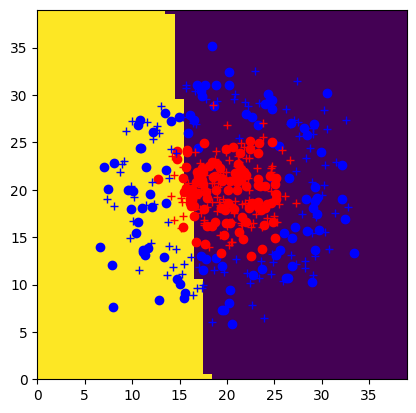

In [28]:
## Print results

Ytest_pred = svm.predict(Xtest)
accuracy = np.sum(Ytest == Ytest_pred) / len(Ytest)
print(f"Accuracy : {100 * accuracy:.2f}")
Ygrid_pred = svm.predict(Xgrid)
plot_svm_predictions(data, Ygrid_pred,'svm_linear.png')

It doesn't work because the expexted decision frontier should be cercle, whereas SVM linear could only compte linear ones

Accuracy : 95.00


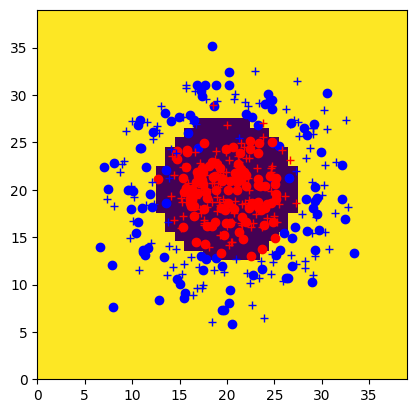

In [29]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# create the classifier
clf = svm.SVC(kernel='poly', C=1.0,degree=8)
# train the classifier
clf.fit(Xtrain, Ytrain)

# predict the labels of the test set
Ytest_pred = clf.predict(Xtest)
accuracy = np.sum(Ytest == Ytest_pred) / len(Ytest)
print(f"Accuracy : {100 * accuracy:.2f}")
Ygrid_pred = clf.predict(Xgrid)
plot_svm_predictions(data, Ygrid_pred,'svm_poly.png')
###########################

Accuracy : 94.00


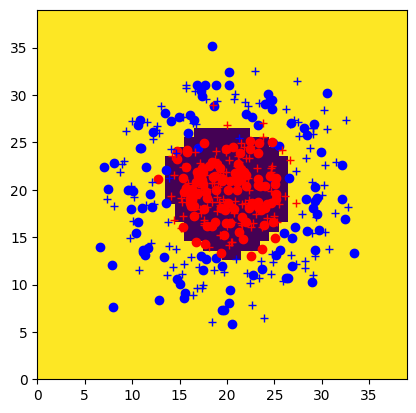

In [30]:
# create the classifier
clf = svm.SVC(kernel='rbf', C=1.0)
# train the classifier
clf.fit(Xtrain, Ytrain)

# predict the labels of the test set
Ytest_pred = clf.predict(Xtest)
accuracy = np.sum(Ytest == Ytest_pred) / len(Ytest)
print(f"Accuracy : {100 * accuracy:.2f}")
Ygrid_pred = clf.predict(Xgrid)
plot_svm_predictions(data, Ygrid_pred,'svm_rbf.png')

RBF works well beacause the frontier expected should be spheric, Poly turns the data in polynomial forms, it will work when the degree is high(degree=8 $\sum_i^8{w_ix^i}$), we will also have something like a sphere

Accuracy : 94.50


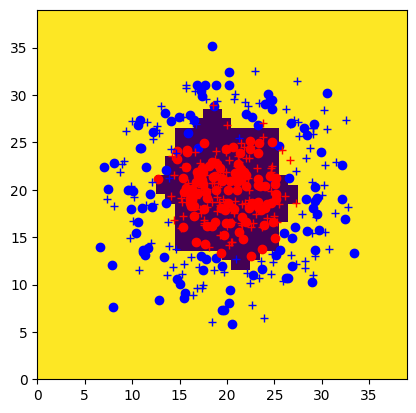

In [31]:
clf = svm.SVC(kernel='poly', C=1000.0,degree=8)
# train the classifier
clf.fit(Xtrain, Ytrain)

# predict the labels of the test set
Ytest_pred = clf.predict(Xtest)
accuracy = np.sum(Ytest == Ytest_pred) / len(Ytest)
print(f"Accuracy : {100 * accuracy:.2f}")
Ygrid_pred = clf.predict(Xgrid)
plot_svm_predictions(data, Ygrid_pred,'svm_poly_C1000.png')

Accuracy : 50.00


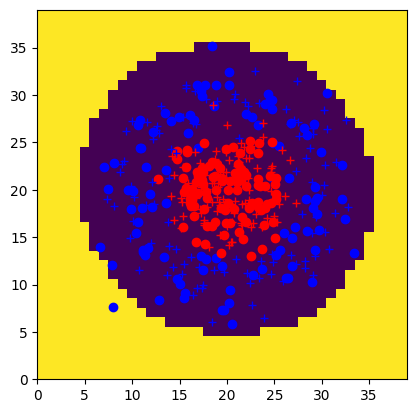

In [32]:
clf = svm.SVC(kernel='poly', C=0.00001,degree=8)
# train the classifier
clf.fit(Xtrain, Ytrain)

# predict the labels of the test set
Ytest_pred = clf.predict(Xtest)
accuracy = np.sum(Ytest == Ytest_pred) / len(Ytest)
print(f"Accuracy : {100 * accuracy:.2f}")
Ygrid_pred = clf.predict(Xgrid)
plot_svm_predictions(data, Ygrid_pred,'svm_poly_C0.00001.png')

As you can see, the C determines the width of frontiers(supported vector), the smaller C is the greater the width will be, and the more tolerant the classifer is. The greater C is, the stricter the classifier turns so that the frontier turns more and more uneven.